In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
from keras import backend as K
np.random.seed(0)

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def create_testdata(dataset, look_back = 1):
    dataX, dataY = [], []
    a = dataset[0:look_back, 0]
    dataX.append(a)
    dataY.append(dataset[look_back, 0])
    return np.array(dataX), np.array(dataY)


In [11]:
df = pd.read_csv("sp500.csv")
df['caldt'] = pd.to_datetime(df['caldt'], format = '%Y%m%d')
df['caldt'] =  df['caldt'].dt.strftime('%Y-%m-%d')
data = df['spindx'].values
data = data.astype('float32')
data = np.reshape(data,(-1,1))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
pred = [] # at the end, append to prediction
num_hidden = 64
# Look back is how many lags do we want. so look back 1 in seq = (1 2 3 4 5) will produce (2 3 4 5 6)
look_back = 5
#df.head()

In [5]:
# Implementing the forward chaining method for LSTM
start = time.time()
for i in range(1792,len(data) - look_back):
    train, test = data[0:i,:], data[i:i+look_back+1,]
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_testdata(test, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(num_hidden,input_shape = (1, look_back), return_sequences = True))
    model.add(Dropout(.15))
    model.add(LSTM(num_hidden,input_shape = (1, look_back), return_sequences = True))
    model.add(Dropout(.15))
    model.add(LSTM(num_hidden,input_shape = (1, look_back), return_sequences = False))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    model.fit(trainX,trainY, epochs = 7, batch_size = 2, verbose = 1)
    testPredict = model.predict(testX)
    # invert predictions
    testPredict = scaler.inverse_transform(testPredict)
    pred.append(testPredict)
    K.clear_session()
end = time.time()

Epoch 1/7
1786/1786 [==============================] - 4s 2ms/step - loss: 0.0030
Epoch 2/7
1786/1786 [==============================] - 2s 1ms/step - loss: 1.2589e-04
Epoch 3/7
1786/1786 [==============================] - 2s 1ms/step - loss: 1.6201e-04
Epoch 4/7
1786/1786 [==============================] - 2s 1ms/step - loss: 1.2199e-04
Epoch 5/7
1786/1786 [==============================] - 3s 2ms/step - loss: 1.1259e-04
Epoch 6/7
1786/1786 [==============================] - 3s 2ms/step - loss: 1.1095e-04
Epoch 7/7
1786/1786 [==============================] - 3s 2ms/step - loss: 1.1425e-04
Epoch 1/7
1787/1787 [==============================] - 4s 2ms/step - loss: 0.0033
Epoch 2/7
1787/1787 [==============================] - 2s 1ms/step - loss: 1.3785e-04
Epoch 3/7
1787/1787 [==============================] - 2s 1ms/step - loss: 1.1594e-04
Epoch 4/7
1787/1787 [==============================] - 3s 1ms/step - loss: 1.2217e-04
Epoch 5/7
1787/1787 [==============================] - 2s 1ms/

1813/1813 [==============================] - 4s 2ms/step - loss: 1.2787e-04
Epoch 4/7
1813/1813 [==============================] - 3s 2ms/step - loss: 1.3487e-04
Epoch 5/7
1813/1813 [==============================] - 3s 2ms/step - loss: 1.0707e-04
Epoch 6/7
1813/1813 [==============================] - 3s 2ms/step - loss: 1.0613e-04
Epoch 7/7
1813/1813 [==============================] - 3s 2ms/step - loss: 1.0279e-04
Epoch 1/7
1814/1814 [==============================] - 5s 3ms/step - loss: 0.0029
Epoch 2/7
1814/1814 [==============================] - 3s 2ms/step - loss: 1.3600e-04
Epoch 3/7
1814/1814 [==============================] - 3s 2ms/step - loss: 1.3782e-04
Epoch 4/7
1814/1814 [==============================] - 3s 2ms/step - loss: 1.3928e-04
Epoch 5/7
1814/1814 [==============================] - 3s 2ms/step - loss: 1.3373e-04
Epoch 6/7
1814/1814 [==============================] - 3s 2ms/step - loss: 1.3227e-04
Epoch 7/7
1814/1814 [==============================] - 3s 2ms/step -

Epoch 1/7
1827/1827 [==============================] - 4s 2ms/step - loss: 0.0034
Epoch 2/7
1827/1827 [==============================] - 2s 1ms/step - loss: 1.3149e-04
Epoch 3/7
1827/1827 [==============================] - 3s 1ms/step - loss: 1.2642e-04
Epoch 4/7
1827/1827 [==============================] - 3s 1ms/step - loss: 1.4162e-04
Epoch 5/7
1827/1827 [==============================] - 2s 1ms/step - loss: 1.3243e-04
Epoch 6/7
1827/1827 [==============================] - 2s 1ms/step - loss: 1.3855e-04
Epoch 7/7
1827/1827 [==============================] - 3s 1ms/step - loss: 1.2857e-04
Epoch 1/7
1828/1828 [==============================] - 4s 2ms/step - loss: 0.0032
Epoch 2/7
1828/1828 [==============================] - 2s 1ms/step - loss: 1.5010e-04
Epoch 3/7
1828/1828 [==============================] - 2s 1ms/step - loss: 1.3033e-04
Epoch 4/7
1828/1828 [==============================] - 2s 1ms/step - loss: 1.2707e-04
Epoch 5/7
1828/1828 [==============================] - 3s 1ms/

1854/1854 [==============================] - 3s 1ms/step - loss: 1.3857e-04
Epoch 4/7
1854/1854 [==============================] - 3s 2ms/step - loss: 1.1870e-04
Epoch 5/7
1854/1854 [==============================] - 3s 2ms/step - loss: 1.4354e-04
Epoch 6/7
1854/1854 [==============================] - 3s 2ms/step - loss: 1.0746e-04
Epoch 7/7
1854/1854 [==============================] - 3s 1ms/step - loss: 1.1913e-04
Epoch 1/7
1855/1855 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 2/7
1855/1855 [==============================] - 3s 2ms/step - loss: 1.3115e-04
Epoch 3/7
1855/1855 [==============================] - 3s 2ms/step - loss: 1.2035e-04
Epoch 4/7
1855/1855 [==============================] - 3s 2ms/step - loss: 1.5194e-04
Epoch 5/7
1855/1855 [==============================] - 3s 2ms/step - loss: 1.1531e-04
Epoch 6/7
1855/1855 [==============================] - 3s 2ms/step - loss: 1.3238e-04
Epoch 7/7
1855/1855 [==============================] - 3s 2ms/step -

Epoch 1/7
1868/1868 [==============================] - 4s 2ms/step - loss: 0.0031
Epoch 2/7
1868/1868 [==============================] - 2s 1ms/step - loss: 1.2233e-04
Epoch 3/7
1868/1868 [==============================] - 3s 1ms/step - loss: 1.2590e-04
Epoch 4/7
1868/1868 [==============================] - 3s 1ms/step - loss: 1.2631e-04
Epoch 5/7
1868/1868 [==============================] - 3s 1ms/step - loss: 1.1852e-04
Epoch 6/7
1868/1868 [==============================] - 3s 1ms/step - loss: 1.1096e-04
Epoch 7/7
1868/1868 [==============================] - 3s 1ms/step - loss: 1.1451e-04
Epoch 1/7
1869/1869 [==============================] - 4s 2ms/step - loss: 0.0031
Epoch 2/7
1869/1869 [==============================] - 2s 1ms/step - loss: 1.2374e-04
Epoch 3/7
1869/1869 [==============================] - 3s 1ms/step - loss: 1.1958e-04
Epoch 4/7
1869/1869 [==============================] - 3s 1ms/step - loss: 1.2929e-04
Epoch 5/7
1869/1869 [==============================] - 3s 1ms/

1895/1895 [==============================] - 4s 2ms/step - loss: 1.4209e-04
Epoch 4/7
1895/1895 [==============================] - 3s 2ms/step - loss: 1.2168e-04
Epoch 5/7
1895/1895 [==============================] - 4s 2ms/step - loss: 1.2918e-04
Epoch 6/7
1895/1895 [==============================] - 4s 2ms/step - loss: 1.1025e-04
Epoch 7/7
1895/1895 [==============================] - 3s 2ms/step - loss: 1.2625e-04
Epoch 1/7
1896/1896 [==============================] - 5s 3ms/step - loss: 0.0028
Epoch 2/7
1896/1896 [==============================] - 3s 2ms/step - loss: 1.2849e-04
Epoch 3/7
1896/1896 [==============================] - 3s 2ms/step - loss: 1.3076e-04
Epoch 4/7
1896/1896 [==============================] - 3s 2ms/step - loss: 1.3388e-04
Epoch 5/7
1896/1896 [==============================] - 3s 2ms/step - loss: 1.3542e-04
Epoch 6/7
1896/1896 [==============================] - 3s 2ms/step - loss: 1.1508e-04
Epoch 7/7
1896/1896 [==============================] - 3s 2ms/step -

1922/1922 [==============================] - 3s 2ms/step - loss: 1.5065e-04
Epoch 6/7
1922/1922 [==============================] - 3s 1ms/step - loss: 1.2037e-04
Epoch 7/7
1922/1922 [==============================] - 3s 2ms/step - loss: 1.1402e-04
Epoch 1/7
1923/1923 [==============================] - 5s 3ms/step - loss: 0.0032
Epoch 2/7
1923/1923 [==============================] - 3s 2ms/step - loss: 1.4773e-04
Epoch 3/7
1923/1923 [==============================] - 3s 2ms/step - loss: 1.2809e-04
Epoch 4/7
1923/1923 [==============================] - 3s 2ms/step - loss: 1.3571e-04
Epoch 5/7
1923/1923 [==============================] - 3s 2ms/step - loss: 1.2954e-04
Epoch 6/7
1923/1923 [==============================] - 3s 2ms/step - loss: 1.3747e-04
Epoch 7/7
1923/1923 [==============================] - 3s 2ms/step - loss: 1.1134e-04A: 0s - loss: 1.1148e-0
Epoch 1/7
1924/1924 [==============================] - 5s 3ms/step - loss: 0.0032
Epoch 2/7
1924/1924 [============================

Epoch 7/7
1949/1949 [==============================] - 3s 2ms/step - loss: 1.1622e-04
Epoch 1/7
1950/1950 [==============================] - 4s 2ms/step - loss: 0.0025
Epoch 2/7
1950/1950 [==============================] - 3s 1ms/step - loss: 1.2590e-04
Epoch 3/7
1950/1950 [==============================] - 3s 1ms/step - loss: 1.3586e-04
Epoch 4/7
1950/1950 [==============================] - 3s 1ms/step - loss: 1.3655e-04
Epoch 5/7
1950/1950 [==============================] - 3s 1ms/step - loss: 1.2535e-04
Epoch 6/7
1950/1950 [==============================] - 3s 1ms/step - loss: 1.2669e-04
Epoch 7/7
1950/1950 [==============================] - 3s 1ms/step - loss: 1.3974e-04
Epoch 1/7
1951/1951 [==============================] - 4s 2ms/step - loss: 0.0030
Epoch 2/7
1951/1951 [==============================] - 3s 1ms/step - loss: 1.4227e-04
Epoch 3/7
1951/1951 [==============================] - 3s 1ms/step - loss: 1.5024e-04
Epoch 4/7
1951/1951 [==============================] - 3s 1ms/

1977/1977 [==============================] - 3s 1ms/step - loss: 1.2932e-04
Epoch 3/7
1977/1977 [==============================] - 3s 1ms/step - loss: 1.3180e-04
Epoch 4/7
1977/1977 [==============================] - 3s 1ms/step - loss: 1.4571e-04
Epoch 5/7
1977/1977 [==============================] - 3s 1ms/step - loss: 1.2142e-04
Epoch 6/7
1977/1977 [==============================] - 3s 1ms/step - loss: 1.3274e-04
Epoch 7/7
1977/1977 [==============================] - 3s 1ms/step - loss: 1.1942e-04
Epoch 1/7
1978/1978 [==============================] - 4s 2ms/step - loss: 0.0032
Epoch 2/7
1978/1978 [==============================] - 3s 1ms/step - loss: 1.3369e-04
Epoch 3/7
1978/1978 [==============================] - 3s 1ms/step - loss: 1.5054e-04
Epoch 4/7
1978/1978 [==============================] - 3s 1ms/step - loss: 1.2783e-04
Epoch 5/7
1978/1978 [==============================] - 3s 1ms/step - loss: 1.3387e-04
Epoch 6/7
1978/1978 [==============================] - 3s 1ms/step -

Epoch 7/7
1990/1990 [==============================] - 3s 2ms/step - loss: 1.3912e-04
Epoch 1/7
1991/1991 [==============================] - 5s 2ms/step - loss: 0.0032
Epoch 2/7
1991/1991 [==============================] - 3s 2ms/step - loss: 1.1958e-04
Epoch 3/7
1991/1991 [==============================] - 3s 2ms/step - loss: 1.4324e-04
Epoch 4/7
1991/1991 [==============================] - 3s 2ms/step - loss: 1.3128e-04
Epoch 5/7
1991/1991 [==============================] - 3s 2ms/step - loss: 1.2374e-04
Epoch 6/7
1991/1991 [==============================] - 3s 2ms/step - loss: 1.2135e-04
Epoch 7/7
1991/1991 [==============================] - 3s 2ms/step - loss: 1.1933e-04
Epoch 1/7
1992/1992 [==============================] - 5s 3ms/step - loss: 0.0030
Epoch 2/7
1992/1992 [==============================] - 3s 2ms/step - loss: 1.2383e-04
Epoch 3/7
1992/1992 [==============================] - 3s 2ms/step - loss: 1.5442e-04
Epoch 4/7
1992/1992 [==============================] - 4s 2ms/

2018/2018 [==============================] - 4s 2ms/step - loss: 1.4932e-04
Epoch 3/7
2018/2018 [==============================] - 4s 2ms/step - loss: 1.2364e-04
Epoch 4/7
2018/2018 [==============================] - 3s 2ms/step - loss: 1.4302e-04
Epoch 5/7
2018/2018 [==============================] - 3s 2ms/step - loss: 1.2989e-04
Epoch 6/7
2018/2018 [==============================] - 3s 2ms/step - loss: 1.1668e-04
Epoch 7/7
2018/2018 [==============================] - 4s 2ms/step - loss: 1.1809e-04
Epoch 1/7
2019/2019 [==============================] - 5s 3ms/step - loss: 0.0035
Epoch 2/7
2019/2019 [==============================] - 3s 2ms/step - loss: 1.2796e-04
Epoch 3/7
2019/2019 [==============================] - 4s 2ms/step - loss: 1.4605e-04
Epoch 4/7
2019/2019 [==============================] - 4s 2ms/step - loss: 1.4378e-04
Epoch 5/7
2019/2019 [==============================] - 3s 2ms/step - loss: 1.4834e-04
Epoch 6/7
2019/2019 [==============================] - 3s 2ms/step -

2045/2045 [==============================] - 3s 1ms/step - loss: 1.4981e-04
Epoch 5/7
2045/2045 [==============================] - 3s 1ms/step - loss: 1.2111e-04
Epoch 6/7
2045/2045 [==============================] - 3s 1ms/step - loss: 1.5021e-04
Epoch 7/7
2045/2045 [==============================] - 3s 2ms/step - loss: 1.1374e-04
Epoch 1/7
2046/2046 [==============================] - 5s 2ms/step - loss: 0.0035
Epoch 2/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.2660e-04
Epoch 3/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.4552e-04
Epoch 4/7
2046/2046 [==============================] - 4s 2ms/step - loss: 1.3975e-04
Epoch 5/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.1356e-04
Epoch 6/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.1992e-04
Epoch 7/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.2504e-04
Epoch 1/7
2047/2047 [==============================] - 5s 2ms/step -

2059/2059 [==============================] - 4s 2ms/step - loss: 1.3315e-04
Epoch 3/7
2059/2059 [==============================] - 3s 2ms/step - loss: 1.4642e-04
Epoch 4/7
2059/2059 [==============================] - 4s 2ms/step - loss: 1.6207e-04
Epoch 5/7
2059/2059 [==============================] - 4s 2ms/step - loss: 1.3710e-04
Epoch 6/7
2059/2059 [==============================] - 3s 2ms/step - loss: 1.1741e-04
Epoch 7/7
2059/2059 [==============================] - 3s 2ms/step - loss: 1.2101e-04
Epoch 1/7
2060/2060 [==============================] - 6s 3ms/step - loss: 0.0042
Epoch 2/7
2060/2060 [==============================] - 4s 2ms/step - loss: 1.4832e-04
Epoch 3/7
2060/2060 [==============================] - 4s 2ms/step - loss: 1.6581e-04
Epoch 4/7
2060/2060 [==============================] - 3s 2ms/step - loss: 1.2760e-04
Epoch 5/7
2060/2060 [==============================] - 4s 2ms/step - loss: 1.2404e-04
Epoch 6/7
2060/2060 [==============================] - 3s 2ms/step -

Epoch 7/7
2072/2072 [==============================] - 4s 2ms/step - loss: 1.1798e-04
Epoch 1/7
2073/2073 [==============================] - 9s 4ms/step - loss: 0.0035
Epoch 2/7
2073/2073 [==============================] - 4s 2ms/step - loss: 1.1939e-04
Epoch 3/7
2073/2073 [==============================] - 4s 2ms/step - loss: 1.4588e-04
Epoch 4/7
2073/2073 [==============================] - 4s 2ms/step - loss: 1.3608e-04
Epoch 5/7
2073/2073 [==============================] - 4s 2ms/step - loss: 1.2368e-04
Epoch 6/7
2073/2073 [==============================] - 4s 2ms/step - loss: 1.5090e-04
Epoch 7/7
2073/2073 [==============================] - 4s 2ms/step - loss: 1.2437e-04
Epoch 1/7
2074/2074 [==============================] - 6s 3ms/step - loss: 0.0037
Epoch 2/7
2074/2074 [==============================] - 4s 2ms/step - loss: 1.1996e-04
Epoch 3/7
2074/2074 [==============================] - 4s 2ms/step - loss: 1.4730e-04
Epoch 4/7
2074/2074 [==============================] - 4s 2ms/

2100/2100 [==============================] - 3s 2ms/step - loss: 1.1812e-04
Epoch 3/7
2100/2100 [==============================] - 3s 2ms/step - loss: 1.3236e-04
Epoch 4/7
2100/2100 [==============================] - 3s 1ms/step - loss: 1.2656e-04
Epoch 5/7
2100/2100 [==============================] - 3s 2ms/step - loss: 1.2762e-04
Epoch 6/7
2100/2100 [==============================] - 3s 2ms/step - loss: 1.2624e-04
Epoch 7/7
2100/2100 [==============================] - 3s 1ms/step - loss: 1.3982e-04
Epoch 1/7
2101/2101 [==============================] - 5s 2ms/step - loss: 0.0040
Epoch 2/7
2101/2101 [==============================] - 3s 1ms/step - loss: 1.2134e-04
Epoch 3/7
2101/2101 [==============================] - 3s 1ms/step - loss: 1.3735e-04
Epoch 4/7
2101/2101 [==============================] - 3s 1ms/step - loss: 1.4601e-04
Epoch 5/7
2101/2101 [==============================] - 3s 2ms/step - loss: 1.2117e-04
Epoch 6/7
2101/2101 [==============================] - 3s 1ms/step -

Epoch 7/7
2113/2113 [==============================] - 3s 2ms/step - loss: 1.0529e-04
Epoch 1/7
2114/2114 [==============================] - 5s 2ms/step - loss: 0.0038
Epoch 2/7
2114/2114 [==============================] - 3s 1ms/step - loss: 1.2365e-04
Epoch 3/7
2114/2114 [==============================] - 3s 1ms/step - loss: 1.3614e-04
Epoch 4/7
2114/2114 [==============================] - 3s 1ms/step - loss: 1.5067e-04
Epoch 5/7
2114/2114 [==============================] - 3s 1ms/step - loss: 1.3307e-04
Epoch 6/7
2114/2114 [==============================] - 3s 1ms/step - loss: 1.1537e-04
Epoch 7/7
2114/2114 [==============================] - 3s 2ms/step - loss: 1.2396e-04
Epoch 1/7
2115/2115 [==============================] - 6s 3ms/step - loss: 0.0037
Epoch 2/7
2115/2115 [==============================] - 4s 2ms/step - loss: 1.5389e-04
Epoch 3/7
2115/2115 [==============================] - 4s 2ms/step - loss: 1.3917e-04
Epoch 4/7
2115/2115 [==============================] - 4s 2ms/

2141/2141 [==============================] - 5s 2ms/step - loss: 0.0034
Epoch 2/7
2141/2141 [==============================] - 4s 2ms/step - loss: 1.4615e-04
Epoch 3/7
2141/2141 [==============================] - 4s 2ms/step - loss: 1.6250e-04
Epoch 4/7
2141/2141 [==============================] - 4s 2ms/step - loss: 1.3163e-04
Epoch 5/7
2141/2141 [==============================] - 4s 2ms/step - loss: 1.4557e-04
Epoch 6/7
2141/2141 [==============================] - 3s 2ms/step - loss: 1.2864e-04
Epoch 7/7
2141/2141 [==============================] - 3s 2ms/step - loss: 1.3966e-04
Epoch 1/7
2142/2142 [==============================] - 5s 3ms/step - loss: 0.0038
Epoch 2/7
2142/2142 [==============================] - 4s 2ms/step - loss: 1.3025e-04
Epoch 3/7
2142/2142 [==============================] - 4s 2ms/step - loss: 1.3086e-04
Epoch 4/7
2142/2142 [==============================] - 4s 2ms/step - loss: 1.5169e-04
Epoch 5/7
2142/2142 [==============================] - 4s 2ms/step - los

2154/2154 [==============================] - 3s 1ms/step - loss: 1.2642e-04
Epoch 7/7
2154/2154 [==============================] - 3s 1ms/step - loss: 1.2515e-04
Epoch 1/7
2155/2155 [==============================] - 5s 2ms/step - loss: 0.0042
Epoch 2/7
2155/2155 [==============================] - 3s 1ms/step - loss: 1.2303e-04
Epoch 3/7
2155/2155 [==============================] - 3s 1ms/step - loss: 1.3071e-04
Epoch 4/7
2155/2155 [==============================] - 3s 1ms/step - loss: 1.5537e-04
Epoch 5/7
2155/2155 [==============================] - 3s 1ms/step - loss: 1.4090e-04
Epoch 6/7
2155/2155 [==============================] - 3s 2ms/step - loss: 1.3670e-04
Epoch 7/7
2155/2155 [==============================] - 3s 1ms/step - loss: 1.1836e-04
Epoch 1/7
2156/2156 [==============================] - 4s 2ms/step - loss: 0.0034
Epoch 2/7
2156/2156 [==============================] - 3s 1ms/step - loss: 1.2794e-04
Epoch 3/7
2156/2156 [==============================] - 3s 1ms/step - los

Epoch 1/7
2182/2182 [==============================] - 5s 2ms/step - loss: 0.0041
Epoch 2/7
2182/2182 [==============================] - 3s 1ms/step - loss: 1.4988e-04
Epoch 3/7
2182/2182 [==============================] - 3s 2ms/step - loss: 1.5915e-04
Epoch 4/7
2182/2182 [==============================] - 3s 1ms/step - loss: 1.4145e-04
Epoch 5/7
2182/2182 [==============================] - 3s 1ms/step - loss: 1.5024e-04
Epoch 6/7
2182/2182 [==============================] - 3s 1ms/step - loss: 1.6500e-04
Epoch 7/7
2182/2182 [==============================] - 3s 1ms/step - loss: 1.6484e-04
Epoch 1/7
2183/2183 [==============================] - 4s 2ms/step - loss: 0.0041
Epoch 2/7
2183/2183 [==============================] - 3s 1ms/step - loss: 1.4057e-04
Epoch 3/7
2183/2183 [==============================] - 3s 1ms/step - loss: 1.4808e-04
Epoch 4/7
2183/2183 [==============================] - 3s 1ms/step - loss: 1.6854e-04
Epoch 5/7
2183/2183 [==============================] - 3s 1ms/

2209/2209 [==============================] - 3s 2ms/step - loss: 1.5711e-04
Epoch 4/7
2209/2209 [==============================] - 3s 1ms/step - loss: 1.6192e-04
Epoch 5/7
2209/2209 [==============================] - 3s 1ms/step - loss: 1.3848e-04
Epoch 6/7
2209/2209 [==============================] - 3s 2ms/step - loss: 1.4304e-04
Epoch 7/7
2209/2209 [==============================] - 3s 1ms/step - loss: 1.5052e-04
Epoch 1/7
2210/2210 [==============================] - 5s 2ms/step - loss: 0.0044
Epoch 2/7
2210/2210 [==============================] - 3s 1ms/step - loss: 1.5817e-04
Epoch 3/7
2210/2210 [==============================] - 3s 1ms/step - loss: 1.6289e-04
Epoch 4/7
2210/2210 [==============================] - 3s 1ms/step - loss: 1.9529e-04
Epoch 5/7
2210/2210 [==============================] - 3s 1ms/step - loss: 1.8616e-04
Epoch 6/7
2210/2210 [==============================] - 3s 2ms/step - loss: 1.6895e-04
Epoch 7/7
2210/2210 [==============================] - 4s 2ms/step -

Epoch 1/7
2223/2223 [==============================] - 5s 2ms/step - loss: 0.0035
Epoch 2/7
2223/2223 [==============================] - 3s 1ms/step - loss: 1.5571e-04
Epoch 3/7
2223/2223 [==============================] - 3s 1ms/step - loss: 1.5496e-04
Epoch 4/7
2223/2223 [==============================] - 3s 1ms/step - loss: 1.6634e-04
Epoch 5/7
2223/2223 [==============================] - 3s 1ms/step - loss: 1.6578e-04
Epoch 6/7
2223/2223 [==============================] - 3s 1ms/step - loss: 1.7739e-04
Epoch 7/7
2223/2223 [==============================] - 5s 2ms/step - loss: 1.5660e-04
Epoch 1/7
2224/2224 [==============================] - 7s 3ms/step - loss: 0.0045
Epoch 2/7
2224/2224 [==============================] - 6s 3ms/step - loss: 1.6149e-04
Epoch 3/7
2224/2224 [==============================] - 6s 3ms/step - loss: 1.5168e-04
Epoch 4/7
2224/2224 [==============================] - 4s 2ms/step - loss: 1.6711e-04
Epoch 5/7
2224/2224 [==============================] - 3s 2ms/

2250/2250 [==============================] - 4s 2ms/step - loss: 1.6377e-04
Epoch 4/7
2250/2250 [==============================] - 5s 2ms/step - loss: 1.6020e-04
Epoch 5/7
2250/2250 [==============================] - 4s 2ms/step - loss: 1.6555e-04
Epoch 6/7
2250/2250 [==============================] - 4s 2ms/step - loss: 1.7392e-04
Epoch 7/7
2250/2250 [==============================] - 4s 2ms/step - loss: 1.3387e-04
Epoch 1/7
2251/2251 [==============================] - 5s 2ms/step - loss: 0.0039
Epoch 2/7
2251/2251 [==============================] - 3s 2ms/step - loss: 1.4259e-04
Epoch 3/7
2251/2251 [==============================] - 4s 2ms/step - loss: 1.5477e-04
Epoch 4/7
2251/2251 [==============================] - 4s 2ms/step - loss: 1.6287e-04
Epoch 5/7
2251/2251 [==============================] - 4s 2ms/step - loss: 1.6998e-04
Epoch 6/7
2251/2251 [==============================] - 3s 2ms/step - loss: 1.7194e-04
Epoch 7/7
2251/2251 [==============================] - 3s 1ms/step -

Epoch 1/7
2264/2264 [==============================] - 6s 3ms/step - loss: 0.0045
Epoch 2/7
2264/2264 [==============================] - 4s 2ms/step - loss: 1.5457e-04
Epoch 3/7
2264/2264 [==============================] - 5s 2ms/step - loss: 1.8933e-04
Epoch 4/7
2264/2264 [==============================] - 4s 2ms/step - loss: 1.6897e-04
Epoch 5/7
2264/2264 [==============================] - 4s 2ms/step - loss: 1.4646e-04
Epoch 6/7
2264/2264 [==============================] - 4s 2ms/step - loss: 1.4703e-04
Epoch 7/7
2264/2264 [==============================] - 4s 2ms/step - loss: 1.5463e-04
Epoch 1/7
2265/2265 [==============================] - 6s 3ms/step - loss: 0.0037
Epoch 2/7
2265/2265 [==============================] - 4s 2ms/step - loss: 1.8050e-04
Epoch 3/7
2265/2265 [==============================] - 4s 2ms/step - loss: 1.8535e-04
Epoch 4/7
2265/2265 [==============================] - 4s 2ms/step - loss: 1.9801e-04
Epoch 5/7
2265/2265 [==============================] - 4s 2ms/

2291/2291 [==============================] - 4s 2ms/step - loss: 1.6188e-04
Epoch 3/7
2291/2291 [==============================] - 4s 2ms/step - loss: 1.5386e-04
Epoch 4/7
2291/2291 [==============================] - 4s 2ms/step - loss: 1.7881e-04
Epoch 5/7
2291/2291 [==============================] - 3s 2ms/step - loss: 1.8010e-04
Epoch 6/7
2291/2291 [==============================] - 4s 2ms/step - loss: 1.5646e-04
Epoch 7/7
2291/2291 [==============================] - 3s 1ms/step - loss: 1.6976e-04
Epoch 1/7
2292/2292 [==============================] - 8s 4ms/step - loss: 0.0051
Epoch 2/7
2292/2292 [==============================] - 4s 2ms/step - loss: 1.7346e-04
Epoch 3/7
2292/2292 [==============================] - 4s 2ms/step - loss: 1.5965e-04
Epoch 4/7
2292/2292 [==============================] - 4s 2ms/step - loss: 1.7088e-04
Epoch 5/7
2292/2292 [==============================] - 3s 1ms/step - loss: 1.6936e-04
Epoch 6/7
2292/2292 [==============================] - 3s 1ms/step -

Epoch 7/7
2304/2304 [==============================] - 4s 2ms/step - loss: 1.4036e-04
Epoch 1/7
2305/2305 [==============================] - 6s 3ms/step - loss: 0.0049
Epoch 2/7
2305/2305 [==============================] - 4s 2ms/step - loss: 1.4746e-04
Epoch 3/7
2305/2305 [==============================] - 4s 2ms/step - loss: 1.8687e-04
Epoch 4/7
2305/2305 [==============================] - 4s 2ms/step - loss: 1.9289e-04
Epoch 5/7
2305/2305 [==============================] - 4s 2ms/step - loss: 1.7584e-04
Epoch 6/7
2305/2305 [==============================] - 4s 2ms/step - loss: 1.5455e-04
Epoch 7/7
2305/2305 [==============================] - 4s 2ms/step - loss: 1.5430e-04
Epoch 1/7
2306/2306 [==============================] - 6s 3ms/step - loss: 0.0051
Epoch 2/7
2306/2306 [==============================] - 3s 1ms/step - loss: 1.4853e-04
Epoch 3/7
2306/2306 [==============================] - 3s 1ms/step - loss: 1.7554e-04
Epoch 4/7
2306/2306 [==============================] - 4s 2ms/

2332/2332 [==============================] - 4s 2ms/step - loss: 1.7455e-04
Epoch 3/7
2332/2332 [==============================] - 4s 2ms/step - loss: 1.5415e-04
Epoch 4/7
2332/2332 [==============================] - 5s 2ms/step - loss: 1.7991e-04
Epoch 5/7
2332/2332 [==============================] - 4s 2ms/step - loss: 1.5548e-04
Epoch 6/7
2332/2332 [==============================] - 4s 2ms/step - loss: 1.7640e-04
Epoch 7/7
2332/2332 [==============================] - 4s 2ms/step - loss: 1.5071e-04
Epoch 1/7
2333/2333 [==============================] - 6s 3ms/step - loss: 0.0044
Epoch 2/7
2333/2333 [==============================] - 4s 2ms/step - loss: 1.8997e-04
Epoch 3/7
2333/2333 [==============================] - 4s 2ms/step - loss: 2.1894e-04
Epoch 4/7
2333/2333 [==============================] - 4s 2ms/step - loss: 1.6889e-04
Epoch 5/7
2333/2333 [==============================] - 4s 2ms/step - loss: 1.7867e-04
Epoch 6/7
2333/2333 [==============================] - 4s 2ms/step -

Epoch 7/7
2345/2345 [==============================] - 3s 1ms/step - loss: 1.6417e-04
Epoch 1/7
2346/2346 [==============================] - 5s 2ms/step - loss: 0.0047
Epoch 2/7
2346/2346 [==============================] - 3s 1ms/step - loss: 1.7578e-04
Epoch 3/7
2346/2346 [==============================] - 3s 1ms/step - loss: 1.6369e-04
Epoch 4/7
2346/2346 [==============================] - 3s 1ms/step - loss: 1.5485e-04
Epoch 5/7
2346/2346 [==============================] - 3s 1ms/step - loss: 1.6405e-04
Epoch 6/7
2346/2346 [==============================] - 4s 2ms/step - loss: 1.8255e-04
Epoch 7/7
2346/2346 [==============================] - 3s 1ms/step - loss: 1.7785e-04
Epoch 1/7
2347/2347 [==============================] - 5s 2ms/step - loss: 0.0030
Epoch 2/7
2347/2347 [==============================] - 3s 1ms/step - loss: 1.5251e-04
Epoch 3/7
2347/2347 [==============================] - 3s 1ms/step - loss: 1.6968e-04
Epoch 4/7
2347/2347 [==============================] - 3s 1ms/

2373/2373 [==============================] - 6s 2ms/step - loss: 1.9033e-04
Epoch 3/7
2373/2373 [==============================] - 5s 2ms/step - loss: 1.8942e-04
Epoch 4/7
2373/2373 [==============================] - 5s 2ms/step - loss: 1.9941e-04
Epoch 5/7
2373/2373 [==============================] - 6s 2ms/step - loss: 1.7133e-04
Epoch 6/7
2373/2373 [==============================] - 6s 2ms/step - loss: 2.2731e-04
Epoch 7/7
2373/2373 [==============================] - 5s 2ms/step - loss: 1.5629e-04
Epoch 1/7
2374/2374 [==============================] - 7s 3ms/step - loss: 0.0043
Epoch 2/7
2374/2374 [==============================] - 5s 2ms/step - loss: 1.8143e-04
Epoch 3/7
2374/2374 [==============================] - 5s 2ms/step - loss: 1.8029e-04
Epoch 4/7
2374/2374 [==============================] - 5s 2ms/step - loss: 1.7926e-04
Epoch 5/7
2374/2374 [==============================] - 4s 2ms/step - loss: 2.0031e-04
Epoch 6/7
2374/2374 [==============================] - 4s 2ms/step -

Epoch 7/7
2386/2386 [==============================] - 4s 1ms/step - loss: 1.7657e-04
Epoch 1/7
2387/2387 [==============================] - 5s 2ms/step - loss: 0.0048
Epoch 2/7
2387/2387 [==============================] - 3s 1ms/step - loss: 1.8841e-04
Epoch 3/7
2387/2387 [==============================] - 3s 1ms/step - loss: 1.9279e-04
Epoch 4/7
2387/2387 [==============================] - 4s 2ms/step - loss: 1.9811e-04
Epoch 5/7
2387/2387 [==============================] - 3s 1ms/step - loss: 2.2921e-04
Epoch 6/7
2387/2387 [==============================] - 3s 1ms/step - loss: 1.8325e-04
Epoch 7/7
2387/2387 [==============================] - 4s 1ms/step - loss: 1.7187e-04
Epoch 1/7
2388/2388 [==============================] - 5s 2ms/step - loss: 0.0041
Epoch 2/7
2388/2388 [==============================] - 3s 1ms/step - loss: 1.7389e-04
Epoch 3/7
2388/2388 [==============================] - 3s 1ms/step - loss: 1.7653e-04
Epoch 4/7
2388/2388 [==============================] - 3s 1ms/

2414/2414 [==============================] - 4s 2ms/step - loss: 2.1788e-04
Epoch 3/7
2414/2414 [==============================] - 4s 2ms/step - loss: 2.3666e-04
Epoch 4/7
2414/2414 [==============================] - 4s 2ms/step - loss: 1.9942e-04
Epoch 5/7
2414/2414 [==============================] - 4s 2ms/step - loss: 2.2487e-04
Epoch 6/7
2414/2414 [==============================] - 4s 2ms/step - loss: 1.8849e-04
Epoch 7/7
2414/2414 [==============================] - 5s 2ms/step - loss: 1.7600e-04
Epoch 1/7
2415/2415 [==============================] - 6s 2ms/step - loss: 0.0050
Epoch 2/7
2415/2415 [==============================] - 4s 2ms/step - loss: 2.7606e-04
Epoch 3/7
2415/2415 [==============================] - 4s 2ms/step - loss: 2.2796e-04
Epoch 4/7
2415/2415 [==============================] - 4s 2ms/step - loss: 2.0183e-04
Epoch 5/7
2415/2415 [==============================] - 4s 2ms/step - loss: 1.9963e-04
Epoch 6/7
2415/2415 [==============================] - 4s 2ms/step -

Epoch 7/7
2427/2427 [==============================] - 4s 2ms/step - loss: 1.6416e-04
Epoch 1/7
2428/2428 [==============================] - 6s 2ms/step - loss: 0.0048
Epoch 2/7
2428/2428 [==============================] - 4s 2ms/step - loss: 1.8025e-04
Epoch 3/7
2428/2428 [==============================] - 4s 2ms/step - loss: 1.9876e-04
Epoch 4/7
2428/2428 [==============================] - 4s 2ms/step - loss: 1.9634e-04
Epoch 5/7
2428/2428 [==============================] - 4s 2ms/step - loss: 1.8907e-04
Epoch 6/7
2428/2428 [==============================] - 4s 2ms/step - loss: 1.6842e-04
Epoch 7/7
2428/2428 [==============================] - 4s 2ms/step - loss: 1.7565e-04
Epoch 1/7
2429/2429 [==============================] - 6s 2ms/step - loss: 0.0045
Epoch 2/7
2429/2429 [==============================] - 4s 2ms/step - loss: 2.2781e-04
Epoch 3/7
2429/2429 [==============================] - 4s 2ms/step - loss: 2.1929e-04
Epoch 4/7
2429/2429 [==============================] - 4s 2ms/

2455/2455 [==============================] - 5s 2ms/step - loss: 0.0049
Epoch 2/7
2455/2455 [==============================] - 3s 1ms/step - loss: 1.9985e-04
Epoch 3/7
2455/2455 [==============================] - 3s 1ms/step - loss: 2.3732e-04
Epoch 4/7
2455/2455 [==============================] - 3s 1ms/step - loss: 1.9842e-04
Epoch 5/7
2455/2455 [==============================] - 3s 1ms/step - loss: 1.7409e-04
Epoch 6/7
2455/2455 [==============================] - 3s 1ms/step - loss: 1.9353e-04
Epoch 7/7
2455/2455 [==============================] - 4s 2ms/step - loss: 1.6449e-04
Epoch 1/7
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0052
Epoch 2/7
2456/2456 [==============================] - 3s 1ms/step - loss: 1.9291e-04
Epoch 3/7
2456/2456 [==============================] - 3s 1ms/step - loss: 1.8231e-04
Epoch 4/7
2456/2456 [==============================] - 3s 1ms/step - loss: 2.0069e-04
Epoch 5/7
2456/2456 [==============================] - 3s 1ms/step - los

2482/2482 [==============================] - 3s 1ms/step - loss: 2.0592e-04
Epoch 4/7
2482/2482 [==============================] - 3s 1ms/step - loss: 2.0989e-04
Epoch 5/7
2482/2482 [==============================] - 4s 2ms/step - loss: 2.1504e-04
Epoch 6/7
2482/2482 [==============================] - 3s 1ms/step - loss: 1.7035e-04
Epoch 7/7
2482/2482 [==============================] - 3s 1ms/step - loss: 1.9620e-04
Epoch 1/7
2483/2483 [==============================] - 5s 2ms/step - loss: 0.0049
Epoch 2/7
2483/2483 [==============================] - 3s 1ms/step - loss: 1.9781e-04
Epoch 3/7
2483/2483 [==============================] - 3s 1ms/step - loss: 2.0729e-04
Epoch 4/7
2483/2483 [==============================] - 3s 1ms/step - loss: 2.1689e-04
Epoch 5/7
2483/2483 [==============================] - 4s 1ms/step - loss: 1.7444e-04
Epoch 6/7
2483/2483 [==============================] - 4s 1ms/step - loss: 1.7245e-04
Epoch 7/7
2483/2483 [==============================] - 3s 1ms/step -

Epoch 1/7
2496/2496 [==============================] - 6s 2ms/step - loss: 0.0045
Epoch 2/7
2496/2496 [==============================] - 5s 2ms/step - loss: 2.1385e-04
Epoch 3/7
2496/2496 [==============================] - 4s 2ms/step - loss: 1.9644e-04
Epoch 4/7
2496/2496 [==============================] - 4s 2ms/step - loss: 1.9943e-04
Epoch 5/7
2496/2496 [==============================] - 4s 2ms/step - loss: 1.9507e-04
Epoch 6/7
2496/2496 [==============================] - 4s 2ms/step - loss: 1.8846e-04
Epoch 7/7
2496/2496 [==============================] - 4s 2ms/step - loss: 2.0126e-04
Epoch 1/7
2497/2497 [==============================] - 6s 3ms/step - loss: 0.0051
Epoch 2/7
2497/2497 [==============================] - 4s 2ms/step - loss: 2.0681e-04
Epoch 3/7
2497/2497 [==============================] - 4s 2ms/step - loss: 2.1230e-04
Epoch 4/7
2497/2497 [==============================] - 4s 2ms/step - loss: 2.2036e-04
Epoch 5/7
2497/2497 [==============================] - 4s 2ms/

2523/2523 [==============================] - 4s 1ms/step - loss: 2.2630e-04
Epoch 4/7
2523/2523 [==============================] - 3s 1ms/step - loss: 2.2439e-04
Epoch 5/7
2523/2523 [==============================] - 4s 2ms/step - loss: 1.5984e-04
Epoch 6/7
2523/2523 [==============================] - 4s 1ms/step - loss: 1.8050e-04
Epoch 7/7
2523/2523 [==============================] - 4s 1ms/step - loss: 1.9982e-04
Epoch 1/7
2524/2524 [==============================] - 5s 2ms/step - loss: 0.0044
Epoch 2/7
2524/2524 [==============================] - 4s 1ms/step - loss: 2.0573e-04
Epoch 3/7
2524/2524 [==============================] - 3s 1ms/step - loss: 2.6645e-04
Epoch 4/7
2524/2524 [==============================] - 4s 1ms/step - loss: 1.8923e-04
Epoch 5/7
2524/2524 [==============================] - 3s 1ms/step - loss: 1.9664e-04
Epoch 6/7
2524/2524 [==============================] - 3s 1ms/step - loss: 2.0848e-04
Epoch 7/7
2524/2524 [==============================] - 3s 1ms/step -

Epoch 1/7
2537/2537 [==============================] - 5s 2ms/step - loss: 0.0054
Epoch 2/7
2537/2537 [==============================] - 3s 1ms/step - loss: 2.2737e-04
Epoch 3/7
2537/2537 [==============================] - 3s 1ms/step - loss: 2.2620e-04
Epoch 4/7
2537/2537 [==============================] - 3s 1ms/step - loss: 2.1654e-04
Epoch 5/7
2537/2537 [==============================] - 3s 1ms/step - loss: 2.3383e-04
Epoch 6/7
2537/2537 [==============================] - 4s 2ms/step - loss: 1.9427e-04
Epoch 7/7
2537/2537 [==============================] - 4s 1ms/step - loss: 1.6222e-04
Epoch 1/7
2538/2538 [==============================] - 6s 2ms/step - loss: 0.0048
Epoch 2/7
2538/2538 [==============================] - 5s 2ms/step - loss: 2.0114e-04
Epoch 3/7
2538/2538 [==============================] - 5s 2ms/step - loss: 2.1049e-04
Epoch 4/7
2538/2538 [==============================] - 5s 2ms/step - loss: 1.9160e-04
Epoch 5/7
2538/2538 [==============================] - 5s 2ms/

2564/2564 [==============================] - 4s 2ms/step - loss: 2.1517e-04
Epoch 3/7
2564/2564 [==============================] - 4s 2ms/step - loss: 2.4132e-04
Epoch 4/7
2564/2564 [==============================] - 5s 2ms/step - loss: 2.2296e-04A: 1
Epoch 5/7
2564/2564 [==============================] - 4s 2ms/step - loss: 2.0467e-04
Epoch 6/7
2564/2564 [==============================] - 5s 2ms/step - loss: 1.9657e-04
Epoch 7/7
2564/2564 [==============================] - 5s 2ms/step - loss: 1.8658e-04
Epoch 1/7
2565/2565 [==============================] - 6s 2ms/step - loss: 0.0051
Epoch 2/7
2565/2565 [==============================] - 4s 2ms/step - loss: 2.5606e-04
Epoch 3/7
2565/2565 [==============================] - 5s 2ms/step - loss: 2.1725e-04
Epoch 4/7
2565/2565 [==============================] - 4s 2ms/step - loss: 2.1822e-04
Epoch 5/7
2565/2565 [==============================] - 4s 2ms/step - loss: 2.0672e-04
Epoch 6/7
2565/2565 [==============================] - 5s 2ms/st

2591/2591 [==============================] - 4s 2ms/step - loss: 2.4208e-04
Epoch 5/7
2591/2591 [==============================] - 5s 2ms/step - loss: 2.3898e-04
Epoch 6/7
2591/2591 [==============================] - 6s 2ms/step - loss: 2.1535e-04
Epoch 7/7
2591/2591 [==============================] - 4s 2ms/step - loss: 1.7763e-04
Epoch 1/7
2592/2592 [==============================] - 7s 3ms/step - loss: 0.0051
Epoch 2/7
2592/2592 [==============================] - 4s 2ms/step - loss: 2.4304e-04
Epoch 3/7
2592/2592 [==============================] - 4s 2ms/step - loss: 1.9713e-04
Epoch 4/7
2592/2592 [==============================] - 5s 2ms/step - loss: 2.2419e-04
Epoch 5/7
2592/2592 [==============================] - 4s 2ms/step - loss: 2.4435e-04
Epoch 6/7
2592/2592 [==============================] - 5s 2ms/step - loss: 2.0184e-04
Epoch 7/7
2592/2592 [==============================] - 5s 2ms/step - loss: 1.7201e-04
Epoch 1/7
2593/2593 [==============================] - 6s 2ms/step -

2605/2605 [==============================] - 5s 2ms/step - loss: 2.0486e-04
Epoch 3/7
2605/2605 [==============================] - 5s 2ms/step - loss: 2.3490e-04
Epoch 4/7
2605/2605 [==============================] - 4s 2ms/step - loss: 2.1628e-04
Epoch 5/7
2605/2605 [==============================] - 4s 2ms/step - loss: 2.3055e-04
Epoch 6/7
2605/2605 [==============================] - 5s 2ms/step - loss: 2.2433e-04
Epoch 7/7
2605/2605 [==============================] - 4s 2ms/step - loss: 1.6473e-04
Epoch 1/7
2606/2606 [==============================] - 6s 2ms/step - loss: 0.0056
Epoch 2/7
2606/2606 [==============================] - 5s 2ms/step - loss: 2.5854e-04
Epoch 3/7
2606/2606 [==============================] - 4s 2ms/step - loss: 2.3187e-04
Epoch 4/7
2606/2606 [==============================] - 4s 2ms/step - loss: 2.6481e-04
Epoch 5/7
2606/2606 [==============================] - 4s 2ms/step - loss: 1.8873e-04
Epoch 6/7
2606/2606 [==============================] - 5s 2ms/step -

2632/2632 [==============================] - 5s 2ms/step - loss: 2.5296e-04
Epoch 4/7
2632/2632 [==============================] - 4s 2ms/step - loss: 2.1532e-04
Epoch 5/7
2632/2632 [==============================] - 5s 2ms/step - loss: 2.1195e-04
Epoch 6/7
2632/2632 [==============================] - 5s 2ms/step - loss: 2.0098e-04
Epoch 7/7
2632/2632 [==============================] - 5s 2ms/step - loss: 1.8447e-04
Epoch 1/7
2633/2633 [==============================] - 6s 2ms/step - loss: 0.0059
Epoch 2/7
2633/2633 [==============================] - 5s 2ms/step - loss: 2.2110e-04
Epoch 3/7
2633/2633 [==============================] - 4s 2ms/step - loss: 1.9424e-04
Epoch 4/7
2633/2633 [==============================] - 4s 2ms/step - loss: 2.6296e-04
Epoch 5/7
2633/2633 [==============================] - 4s 2ms/step - loss: 1.9499e-04
Epoch 6/7
2633/2633 [==============================] - 4s 2ms/step - loss: 1.9006e-04
Epoch 7/7
2633/2633 [==============================] - 5s 2ms/step -

Epoch 1/7
2646/2646 [==============================] - 6s 2ms/step - loss: 0.0052
Epoch 2/7
2646/2646 [==============================] - 4s 2ms/step - loss: 2.2077e-04
Epoch 3/7
2646/2646 [==============================] - 4s 1ms/step - loss: 2.3122e-04
Epoch 4/7
2646/2646 [==============================] - 4s 1ms/step - loss: 2.2710e-04
Epoch 5/7
2646/2646 [==============================] - 4s 2ms/step - loss: 2.2018e-04
Epoch 6/7
2646/2646 [==============================] - 4s 2ms/step - loss: 2.0816e-04
Epoch 7/7
2646/2646 [==============================] - 4s 1ms/step - loss: 1.9200e-04
Epoch 1/7
2647/2647 [==============================] - 6s 2ms/step - loss: 0.0054
Epoch 2/7
2647/2647 [==============================] - 4s 2ms/step - loss: 2.2847e-04
Epoch 3/7
2647/2647 [==============================] - 4s 2ms/step - loss: 2.1533e-04
Epoch 4/7
2647/2647 [==============================] - 4s 2ms/step - loss: 2.0989e-04
Epoch 5/7
2647/2647 [==============================] - 4s 2ms/

In [6]:
print(end - start)

25005.578514814377


In [15]:
predicted = pd.DataFrame(np.reshape(pred,(-1,1)))
predicted.to_csv('Predicted5_3lay_64.csv')

In [10]:
testScore = math.sqrt(mean_squared_error(scaler.inverse_transform(data[1797:len(data)]), np.reshape(pred,(-1,1))))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 44.50 RMSE


In [12]:
df = pd.read_csv('Predicted5_3lay_64.csv')

In [26]:
pred = np.array(df['0'])

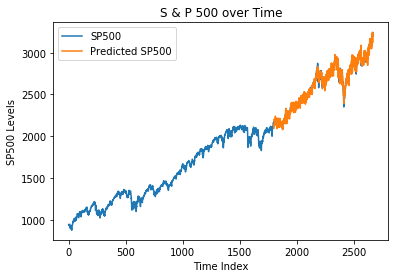

In [31]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
#5+(look_back*2)-2:len(data)
testPredictPlot[1797:, :] =  np.reshape(pred,(-1,1))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data),label = "SP500")
plt.plot(testPredictPlot, label = "Predicted SP500")
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
#plt.show()
plt.title("S & P 500 over Time")
plt.savefig('complicated model.png')

In [1]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
#5+(look_back*2)-2:len(data)
testPredictPlot[1797:, :] = np.reshape(pred,(-1,1))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data)[2300:],label = "SP500")
plt.plot(testPredictPlot[2300:], label = "Predicted SP500")
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
#plt.show()
plt.title("S & P 500 over Time")
#plt.savefig('sp500_plt5_3lay.png')

NameError: name 'np' is not defined